In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

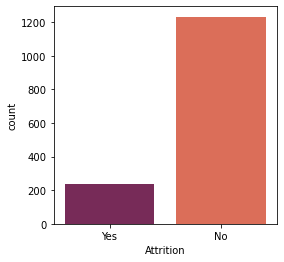

In [6]:
# Attrition column
plt.figure(figsize=(4,4))
sns.countplot(x = data.Attrition , palette ='rocket')
plt.show()

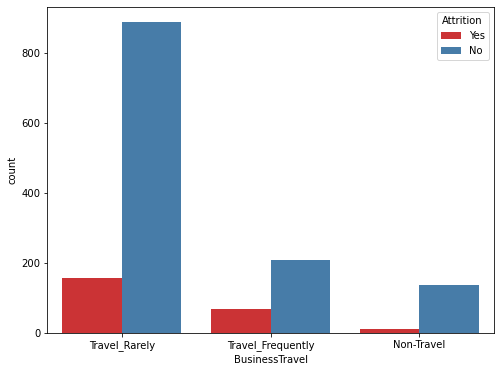

In [7]:
# Impact of Business Travel on Attrition
plt.figure(figsize=(8,6))
sns.countplot(x = 'BusinessTravel' , hue = 'Attrition', data = data , palette = 'Set1')
plt.show()

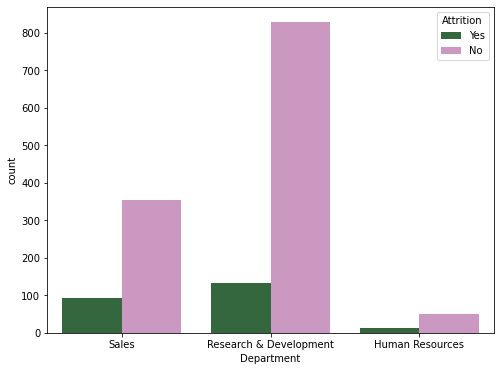

In [8]:
# Impact of Department on Attrition
plt.figure(figsize=(8,6))
sns.countplot(x = 'Department' , hue = 'Attrition', data = data , palette = 'cubehelix')
plt.show()

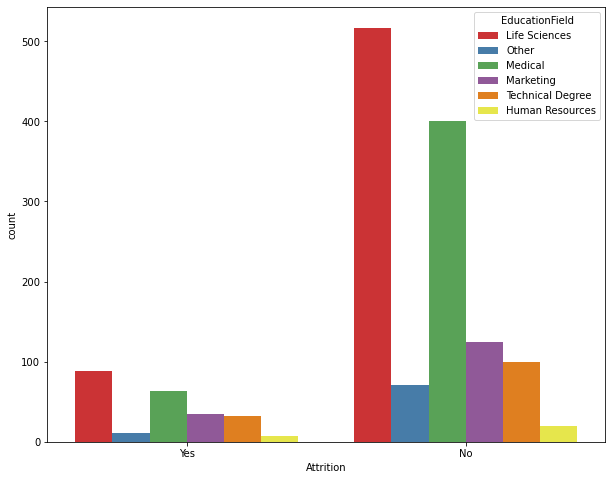

In [11]:
# Impact of Education Field on Attrition
plt.figure(figsize=(10,8))
sns.countplot(hue = 'EducationField' , x = 'Attrition', data = data , palette = 'Set1')
plt.show()

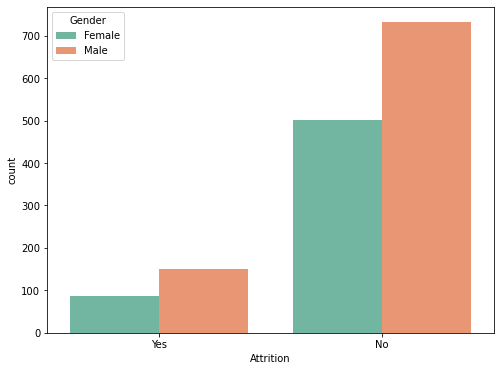

In [34]:
# Comparition Between Gender and Attrition
plt.figure(figsize=(8,6))
sns.countplot(x = 'Attrition' , hue = 'Gender', data = data , palette = 'Set2')
plt.show()

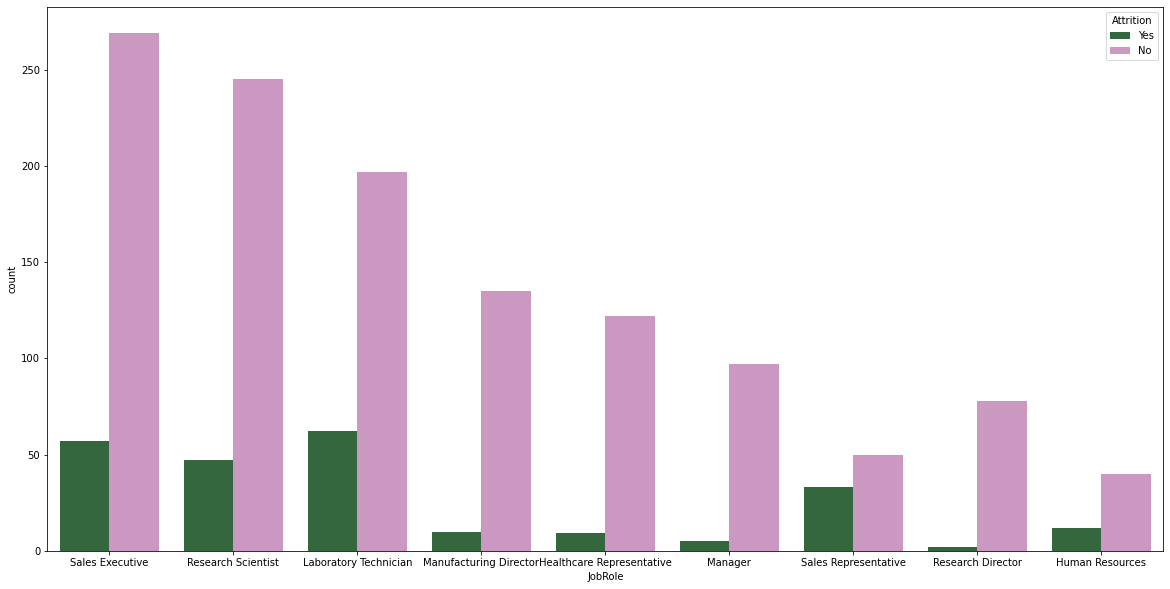

In [12]:
# Comparing Jobrole and Attrition
plt.figure(figsize=(20,10))
sns.countplot(x = 'JobRole' , hue = 'Attrition', data = data , palette = 'cubehelix')
plt.show()

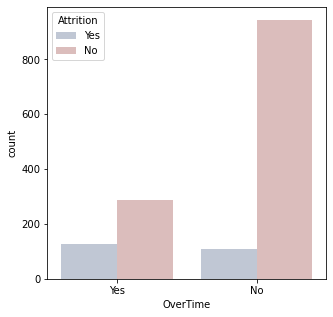

In [16]:
# Comparing Overtime and Attrition
plt.figure(figsize=(5,5))
sns.countplot(x = 'OverTime' , hue = 'Attrition', data = data , palette = 'vlag')
plt.show()

# Categorical Data Handling

In [26]:
data.Attrition = data.Attrition.map({'Yes':1 , 'No' : 0})

data.BusinessTravel = data.BusinessTravel.map({'Travel_Rarely':2 , 'Travel_Frequently' : 1, 'Non-Travel': 0})

data.Department = data.Department.map({'Sales': 2 , 'Research & Development' : 1 , 'Human Resources' : 0})

data.EducationField = data.EducationField.map({'Life Sciences':5 , 'Medical':4 , 'Marketing':3 , 'Technical Degree':2 ,
                                               'Other':1 , 'Human Resources':0})

data.JobRole = data.JobRole.map({'Laboratory Technician':8 , 'Sales Executive':7 , 'Research Scientist':6 
                                               , 'Sales Representative':5 , 'Human Resources':4 , 'Manufacturing Director':3 ,
                                                'Healthcare Representative':2 , 'Manager':1 , 'Research Director':0})

data.MaritalStatus = data.MaritalStatus.map({'Single':2 , 'Married':1 , 'Divorced':0})

data.OverTime = data.OverTime.map({'Yes':1 , 'No':0})

In [27]:
# Creating Dummies

data.Gender = pd.get_dummies(data.Gender, drop_first = True)

In [28]:
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1 , inplace = True)

In [29]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,5,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,5,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,4,1,1,...,3,4,1,6,3,3,2,2,2,2


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   uint8
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [32]:
# Model Creation
x = data.drop('Attrition', axis = 1)
y = data['Attrition']

In [34]:
# Balancing the Target Column using SMOTE

sm = SMOTE()
print('unbalanced data :' , Counter(y))

x_sm,y_sm = sm.fit_resample(x,y)
print('balanced data :' , Counter(y_sm))

unbalanced data : Counter({0: 1233, 1: 237})
balanced data : Counter({1: 1233, 0: 1233})


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_sm ,y_sm , test_size = 0.25 , random_state = 50)

In [37]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dt.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8314424635332253

In [41]:
# Confusion Matrix
c_mat = confusion_matrix(y_test,y_pred)

c_mat

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       290
           1       0.83      0.85      0.84       327

    accuracy                           0.83       617
   macro avg       0.83      0.83      0.83       617
weighted avg       0.83      0.83      0.83       617



In [42]:
rf = RandomForestClassifier (n_estimators = 50)

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [43]:
y_pred = rf.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9092382495948136

In [45]:
# Confusion Matrix
c_mat = confusion_matrix(y_test,y_pred)

c_mat

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       290
           1       0.93      0.89      0.91       327

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

